# Investigate rotational invariance for suspicious classes? Airplane, maybe others

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import pandas as pd
from read_results import load_results, convert_num_to_percent

df = load_results('ModelNet40')
base_path = df.loc[0]['model_path']
paths = [os.path.join(base_path, i) for i in os.listdir(base_path)]

In [10]:
df

,accuracy,mean_avg_prec,rot_accuracy,rot_mean_avg_prec,primary_cap_kernel_size,n_channels,lam_recon,first_layer_kernel_size,dim_sub_capsule,dim_primary_capsule,conv_layer_filters,NUM_EPOCHS,INIT_LR,model_path
7,0.80511,0.64885,0.39384,0.32519,9,1,0.04,9,8,8,256,50,0.008,results/ModelNet40_base_model_acc_080511_map_0...
6,0.76297,0.59170,NaN,NaN,9,4,0.04,9,16,4,24,10,0.008,results/ModelNet40_base_model_acc_076297_map_0...
4,0.75486,0.58689,NaN,NaN,9,8,0.04,9,16,4,24,10,0.008,results/ModelNet40_base_model_acc_075486_map_0...
1,0.73744,0.55776,NaN,NaN,9,4,0.04,9,8,4,24,10,0.008,results/ModelNet40_base_model_acc_073744_map_0...
0,0.73622,0.54835,NaN,NaN,9,8,0.04,9,8,4,24,10,0.008,results/ModelNet40_base_model_acc_073622_map_0...
2,0.68882,0.48273,NaN,NaN,5,4,0.04,9,8,4,24,10,0.008,results/ModelNet40_base_model_acc_068882_map_0...
3,0.61912,0.41612,NaN,NaN,5,4,0.04,9,16,4,24,10,0.008,results/ModelNet40_base_model_acc_061912_map_0...
5,0.07000,0.13858,NaN,NaN,5,5,0.04,9,16,5,48,2,0.008,results/ModelNet40_two_convcaps_layers_acc_007...


What do map activations look like for:
- high discriminative power: Night Stand vs Dresser True Positive High Confidence
- low discriminative power: Night Stand False Negative, Night Stand True Positive Low Confidence

In [11]:
import numpy as np
from keras.utils import to_categorical
from data import load_data, load_custom_model
from plots import plot_compare_recons, plot_recons, plot_vox, plot_dots

(_, _), (x_test, y_test), target_names = load_data('ModelNet40')
y_test = to_categorical(y_test)
y_pred = np.load(os.path.join(base_path, 'y_pred.npy'))
manipulate_model = load_custom_model(os.path.join(base_path, 'models', 'manipulate_model.hdf5'))

eval_model = load_custom_model(os.path.join(base_path, 'models', 'eval_model.hdf5'))

latent_space = np.load(os.path.join(base_path, 'latent_space.npy'))

Instructions for updating:
dim is deprecated, use axis instead


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


###### What do map activations look like for a Night stands

In [48]:
kind = 'airplane'
sub_index = 1
# sub_index_2 = 2
tp_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
           (np.argmax(y_pred, axis=1) == target_names.index(kind))
x_tp = x_test[tp_index][sub_index]
y_tp = y_test[tp_index][sub_index]


x_rot = np.rot90(x_tp.reshape(30, 30, 30), axes=(0, 1))
# fn_index = (np.argmax(y_test, axis=1) == target_names.index(kind)) &\
#            (np.argmax(y_pred, axis=1) != target_names.index(kind))
# x_fn = x_test[fn_index][sub_index_2]
# y_fn = y_test[fn_index][sub_index_2]

###### True Positive

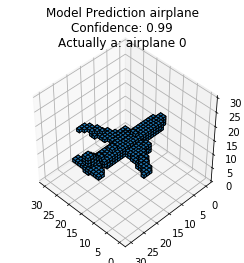

In [49]:
prediction = eval_model.predict(x_tp.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tp.reshape(30, 30, 30), title="Model Prediction {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tp)]).strip('0'))

###### True Positive Rotated

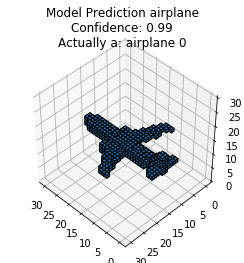

In [50]:
prediction = eval_model.predict(x_rot.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_rot.reshape(30, 30, 30), title="Model Prediction {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tp)]).strip('0'))

###### Look at Dimensional Perturbations for Plane vs Rotated Plane

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


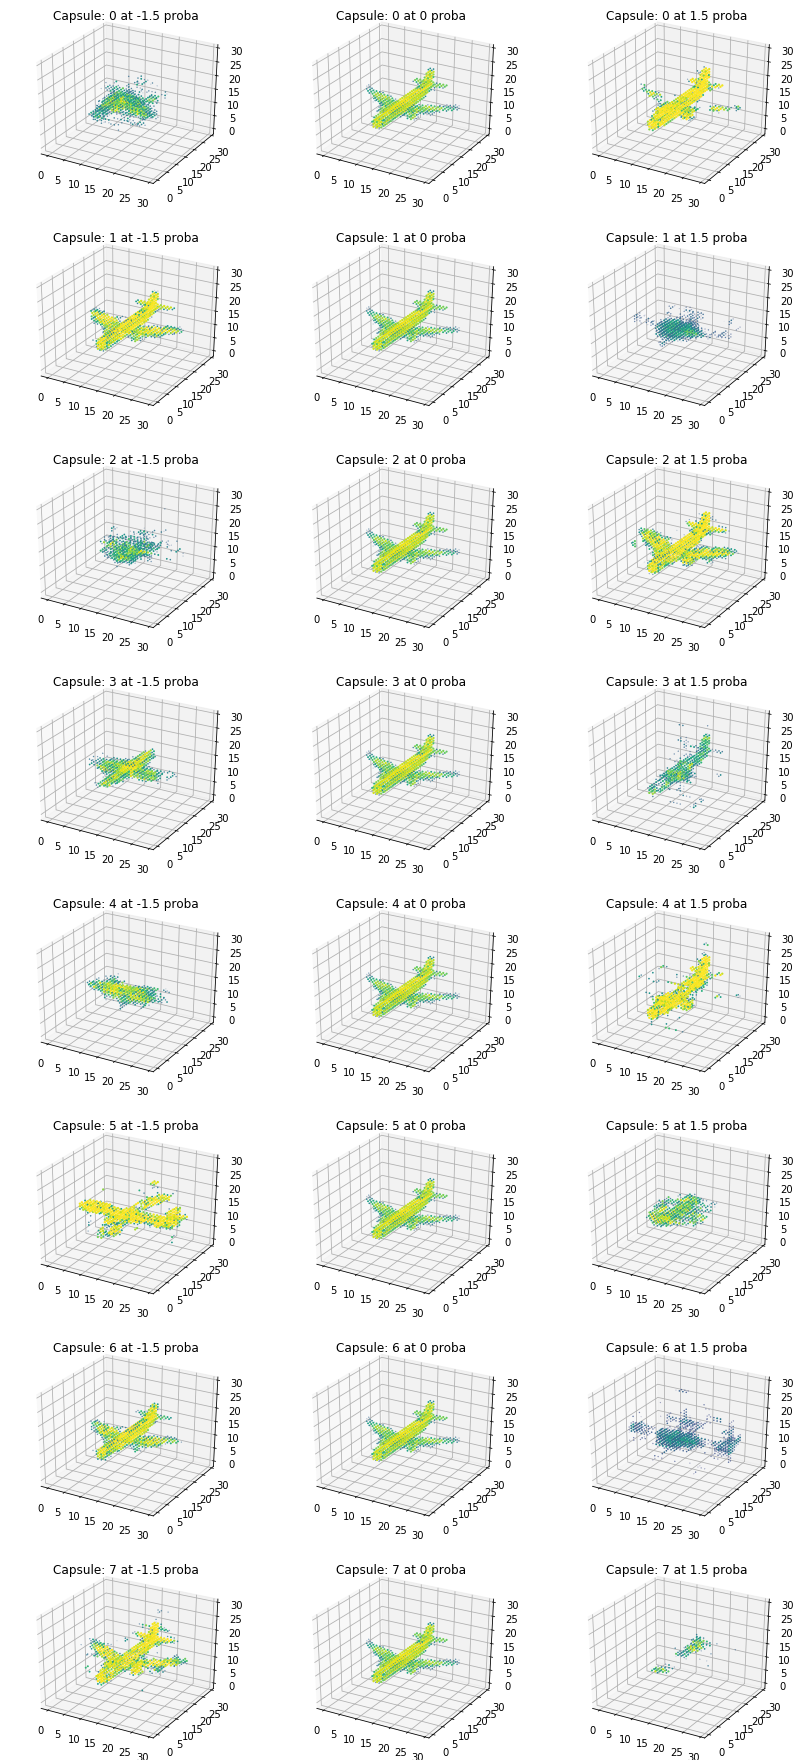

In [51]:
# plot_compare_recons(x_tp, x_fn, y_tp, y_fn, 8,
#                     manipulate_model, proba_range=[-1.5, 0, 1.5],
#                     dotsize_scale=10, dotsize_offset=3)


plot_recons(x_tp, y_tp, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


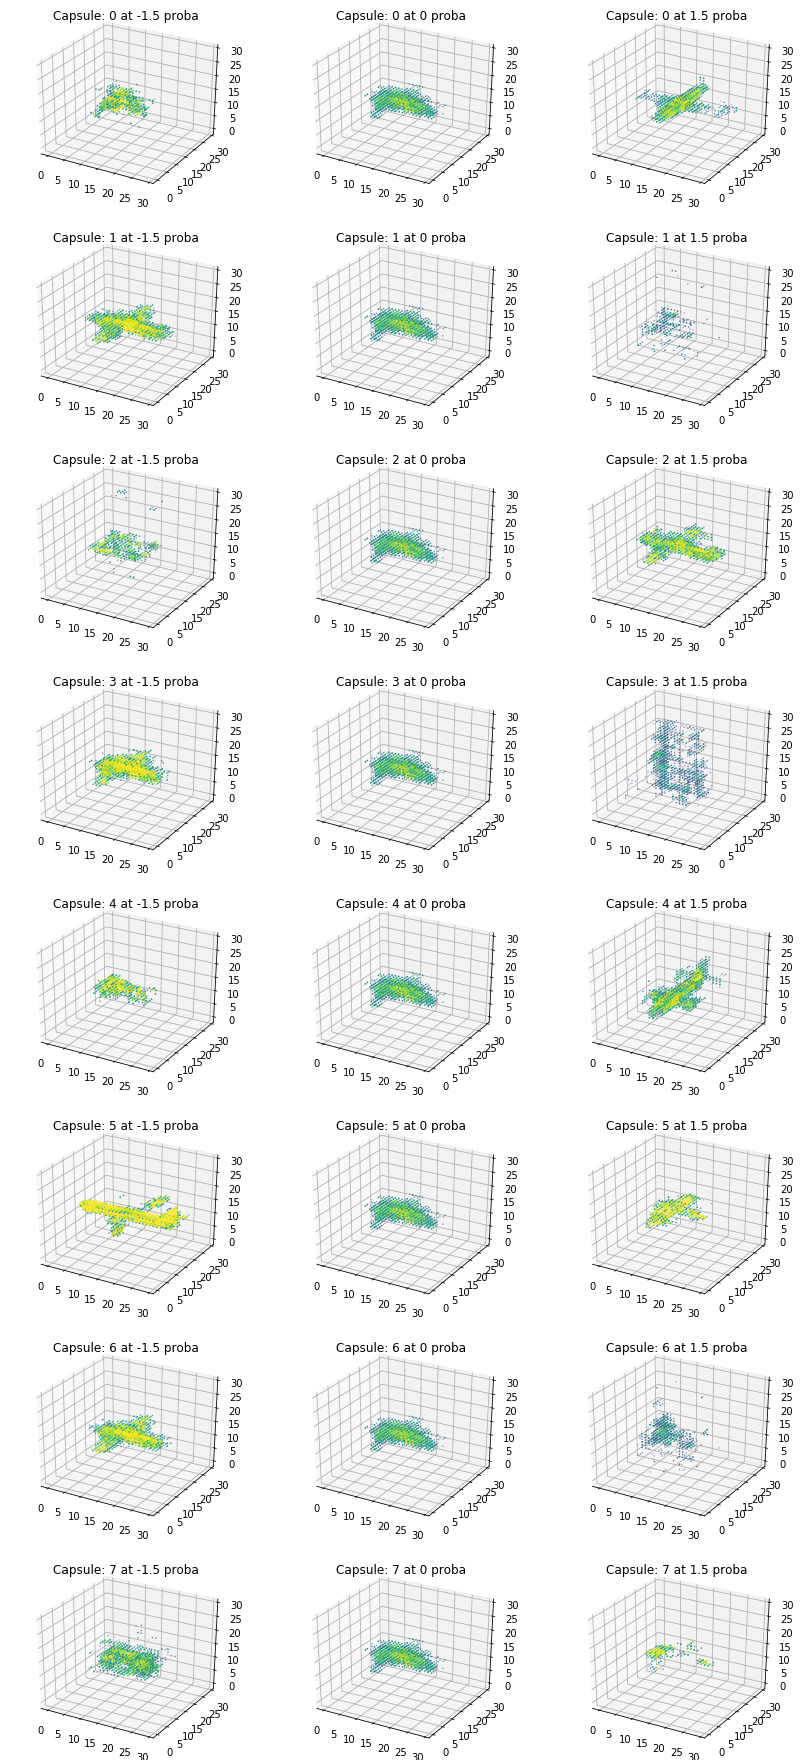

In [54]:
plot_recons(x_rot.reshape(30, 30, 30, 1), y_tp, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

###### What do dimensional perturbations look like for successful discrimination between nightstands and dressers

In [22]:
sub_index = 0
sub_index_2 = 0
tp_index = (np.argmax(y_test, axis=1) == target_names.index('airplane')) &\
           (np.argmax(y_pred, axis=1) == target_names.index('airplane')) &\
           (np.max(y_pred, axis=1) > .93)
x_tp = x_test[tp_index][sub_index]
y_tp = y_test[tp_index][sub_index]

tn_index = (np.argmax(y_test, axis=1) == target_names.index('guitar')) &\
           (np.argmax(y_pred, axis=1) == target_names.index('guitar')) &\
           (np.max(y_pred, axis=1) > .89) # as similar as possible yet confidently different
x_tn = x_test[tn_index][sub_index_2]
y_tn = y_test[tn_index][sub_index_2]

###### True Positive

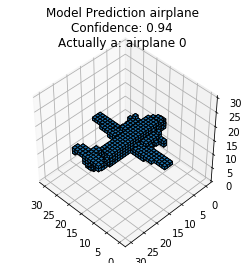

In [23]:
prediction = eval_model.predict(x_tp.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tp.reshape(30, 30, 30), title="Model Prediction {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tp)]).strip('0'))

###### True Negative

Night Stand True Positive and True Negative (dresser True Positive) High Discriminative Power

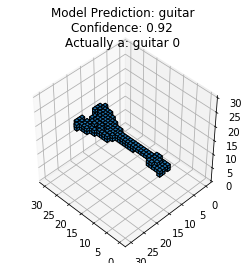

In [24]:
prediction = eval_model.predict(x_tn.reshape(1, 30, 30, 30, 1))[0]

plot_vox(x_tn.reshape(30, 30, 30), title="Model Prediction: {}\nConfidence: {:.2f}\nActually a: {}"\
      .format(target_names[np.argmax(prediction)], prediction.max(),
              target_names[np.argmax(y_tn)]))

###### Look at Dimensional Perturbations TP Night Stand high confidence, TN Night Stand high confidence (Dresser) 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


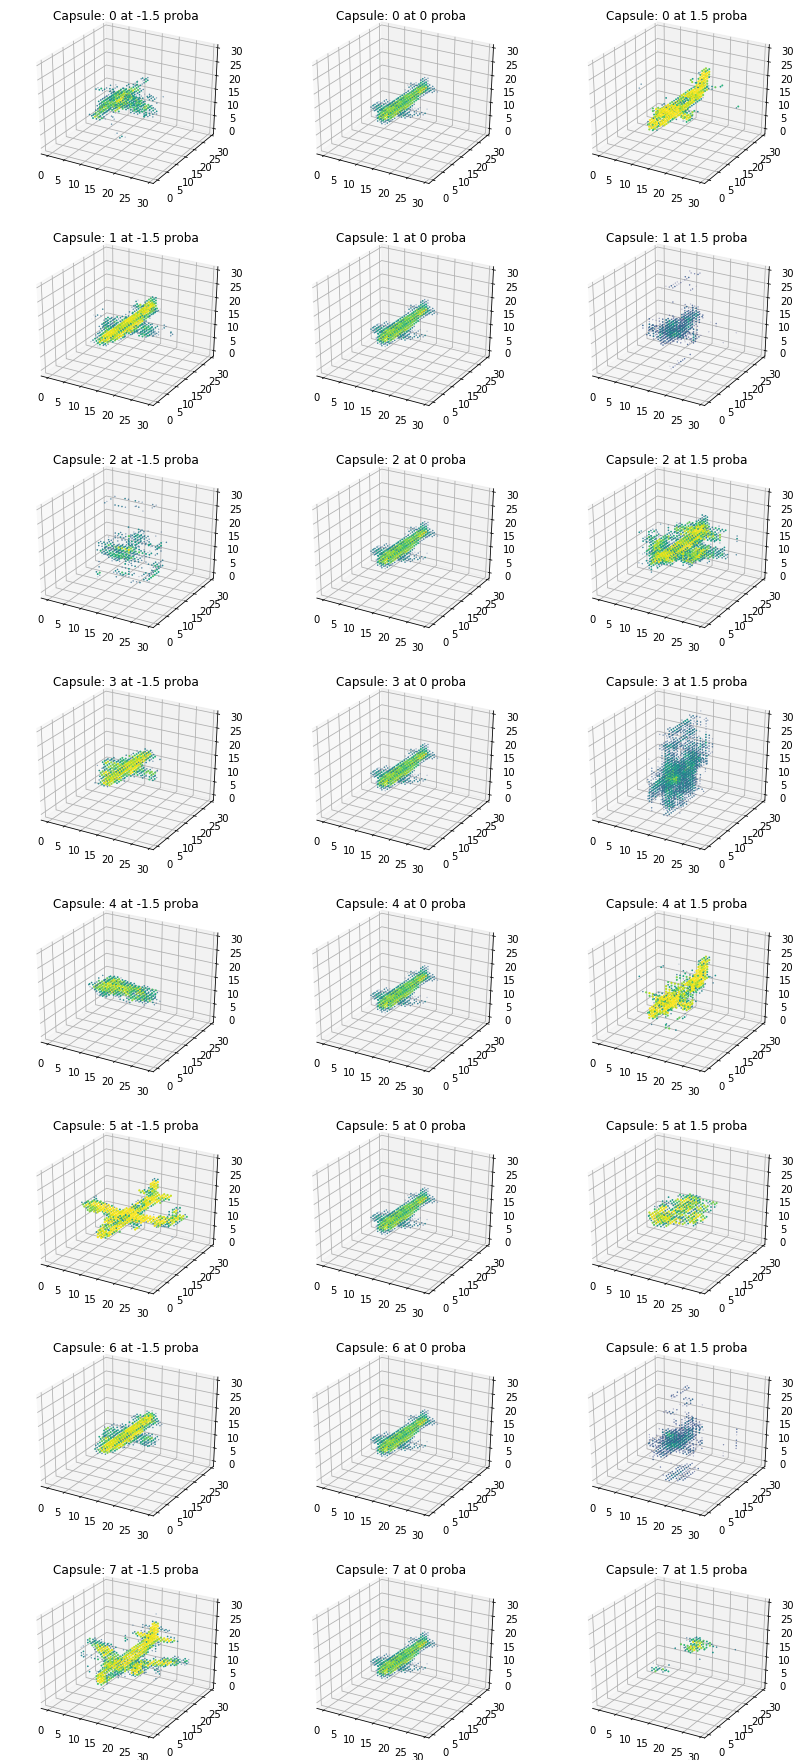

In [25]:
# plot_compare_recons(x_tp, x_fn, y_tp, y_fn, 8,
#                     manipulate_model, proba_range=[-1.5, 0, 1.5],
#                     dotsize_scale=10, dotsize_offset=3)


plot_recons(x_tp, y_tp, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


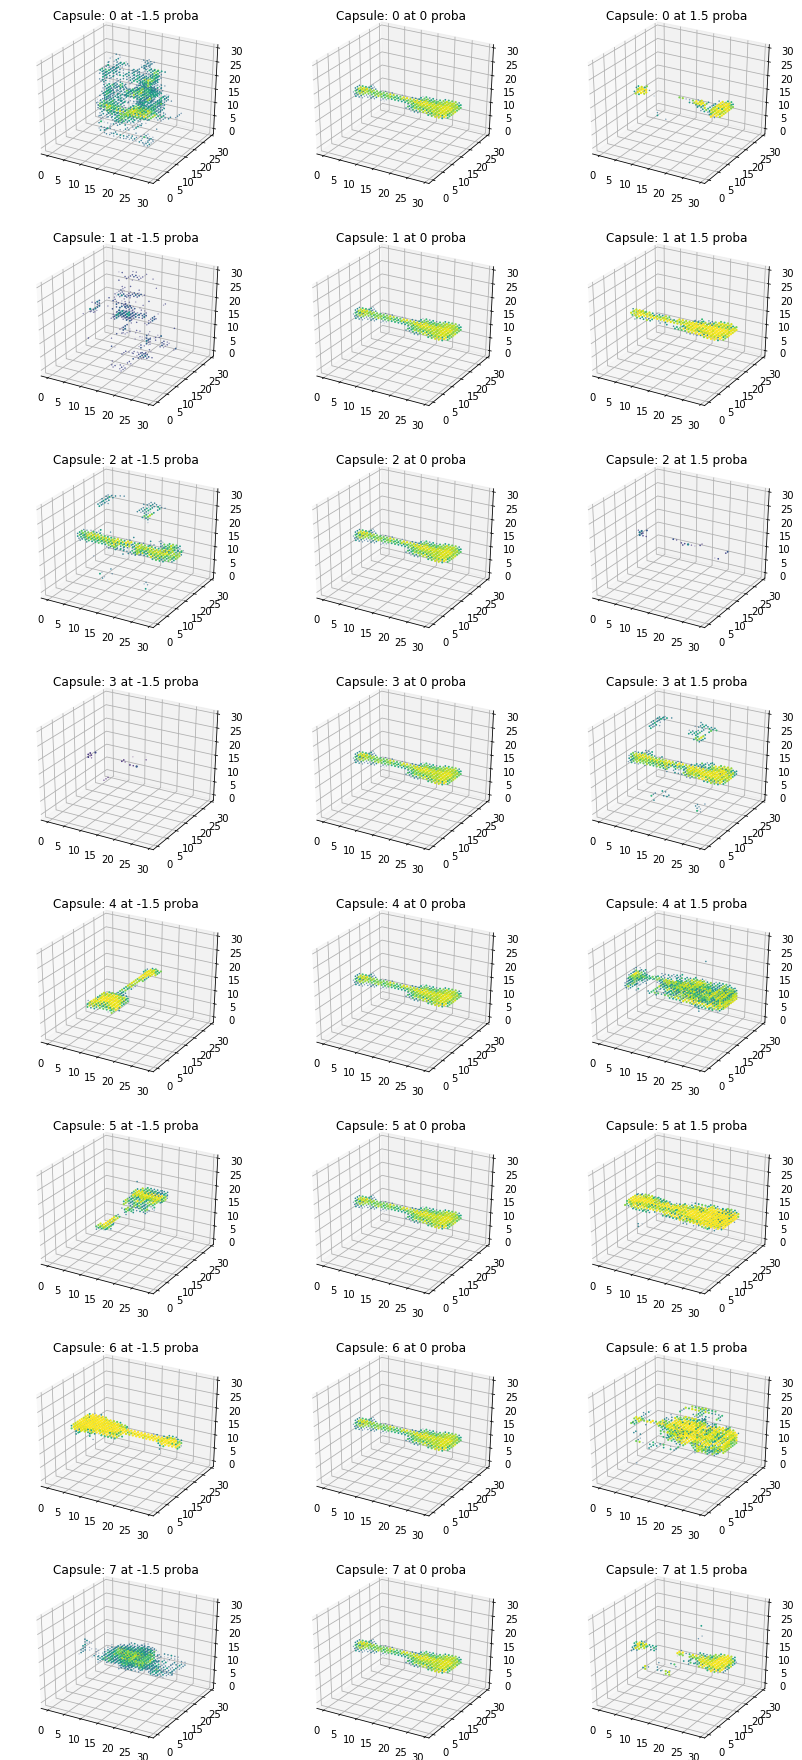

In [26]:
plot_recons(x_tn, y_tn, 8,
            manipulate_model, dotsize_scale=10, proba_range=[-1.5, 0, 1.5],
            dotsize_offset=3)

In [55]:
import pandas as pd

standing on the 3dshapenet benchmark

In [76]:
a = [    89.3, 97.37, 0, 84.5, 95.56, 90.5, 82.10, 86.50, 0, 91.6, 87.8, 93.8, 83.2, 90.7, 91.4, 88.4, 89.2, 91.8, 88.93, 81.26, 83.9, 90, 0, 83.3, 95.54, 0, 90.8, 90.7, 90.1, 83.10, 83, 77.63, 77]
b = [                      0, 0, 0, 0, 86.34, 80.1, 0, 0, 0, 0, 0, 0, 0, 83.5, 0, 0, 0, 0, 0, 0, 51.3, 0, 0, 0, 0, 0, 0, 0, 79.5, 81.94, 0, 76.81, 49.2]
c = [ 93.6, 98.46, 94.37, 95.4, 96.85, 0, 0, 0, 94.37, 95.2, 91.5, 0, 90.0, 91.1, 0, 0, 0, 94.0, 93.94, 88.0, 88.4, 0, 77.6, 91.0, 97.14, 93.8, 93.11, 92.8, 0, 92.35, 92, 85.45, 83.5]
d = [                      0, 0 ,0, 0, 93.28, 0, 0, 0, 0, 0, 0, 0, 0, 87.4, 0, 0, 0, 0, 0, 0, 74.0, 0, 0, 0, 0, 0 ,0, 0, 0, 91.12, 0, 84.18, 68.3]

df = pd.DataFrame({'ModelNet40_Acc': a,
                  'ModelNet40_MAP': b,
                  'ModelNet10_Acc':c,
                  'ModelNet10_MAP':d})

In [103]:
df[(df['ModelNet40_Acc'] != 0) & (df['ModelNet40_Acc'] < 80.51)].shape[0]/(df['ModelNet40_Acc'] != 0).sum()

0.06896551724137931

In [104]:
df[(df['ModelNet40_MAP'] != 0) & (df['ModelNet40_MAP'] < 80.51)].shape[0]/(df['ModelNet40_MAP'] != 0).sum()

0.625

In [107]:
df[(df['ModelNet10_Acc'] != 0) & (df['ModelNet10_Acc'] < 80.51)].shape[0]/(df['ModelNet10_Acc'] != 0).sum()

0.041666666666666664

In [106]:
df[(df['ModelNet10_MAP'] != 0) & (df['ModelNet10_MAP'] < 80.51)].shape[0]/(df['ModelNet10_MAP'] != 0).sum()

0.3333333333333333